In [ ]:
%pip install pandas seaborn pingouin

In [2]:
import pandas as pd
import pingouin as pg
import seaborn as sns

## Using Data Science Notebooks to Report Analysis Results




Data science notebooks, like Jupyter Notebooks, have changed how researchers do and share their work. These notebooks let you mix code, data, and text in one place. This helps researchers explain their methods and show their results clearly. You can include code, text, equations, charts, and even videos. This makes it easier to share complex ideas with others, like peers, reviewers, and the public.

One big benefit of data science notebooks is that they help make research reproducible. Reproducibility means that others can repeat your work and get the same results. Notebooks save the whole process of your analysis, from data cleaning to final results. By sharing the notebook, you give others everything they need to repeat your study, including the exact code and outputs. This builds trust in your findings and helps others build on your work.

In this notebook, we'll try out the following Python packages, doing a few analyses and showing their results right next to the code:
  -  `pandas`: Makes it simple to reference variables in a study and show a table of the data, 
  - `seaborn`: Makes it simple to make plots from pandas tables,
  - `pingouin`: Makes nice statistical tables from pandas tables.

### Our Dataset: The Passengers on the Titanic

below, we load the data.  Every row is a passenger, every column is a variable about that passenger.  Please run the code and take a look at the dataset.  We'll use it in the next two sections.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Reporting Statistics using the Pingouin Package and Visualizing Data with the Seaborn Package


|  Code  | Description |
| :-- | :-- |
| **`import pingouin as pg`**  | Imports the (already-installed) package.  Can be called starting with `pg.<function_name>` |
| **`pg.anova(data=df, dv='measurement_variable', between='group_variable', detailed=True)`** | Do a simple ANOVA between N groups of people |
| **`pg.pairwise_tukey(data=df, dv='measurement_variable', between='group_variable')`** | Do pairwise t-tests on all combinations of the grouping variable |
| **`import seaborn as sns`** | Load the (already-installed) `seaborn` package.  Its functions can be used by starting with `sns.<function_name>` |
| **`sns.barplot(data=df, x='Group Variable', y='Measurement Variable', hue='An Extra Measurement Variable')`** | Make a bar plot of the data. |


**Exercises**

**Example: Was there a significant difference in mean passenger age between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

In [7]:
pg.anova(df, between='class', dv='age', )

,Source,ddof1,ddof2,F,p-unc,np2
0,class,2,711,57.443484,7.487984e-24,0.139107


T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

In [26]:
pg.pairwise_tukey(df, between='class', dv='age', )

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,First,Second,38.233441,29.87763,8.355811,1.425650,5.861051,2.109710e-08,0.578156
1,First,Third,38.233441,25.14062,13.092821,1.221725,10.716671,0.000000e+00,0.980658
2,Second,Third,29.877630,25.14062,4.737010,1.251483,3.785116,4.884441e-04,0.363671


Make a bar plot to show the mean value of each group:

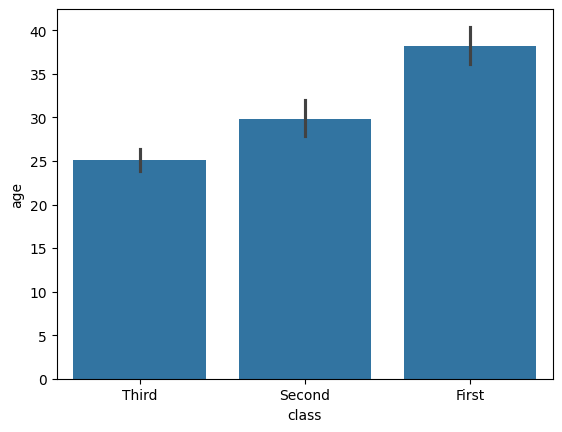

In [9]:
class_order = ['Third', 'Second', 'First']
sns.barplot(df, x='class', y='age', order=class_order);

**Was there a significant difference in mean fare between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

In [ ]:
pg.anova(data=df, between='class', dv='fare')

,Source,ddof1,ddof2,F,p-unc,np2
0,class,2,888,242.344157,1.031376e-84,0.353094


In [10]:
pg.anova(data=df, between='pclass', dv='fare')

,Source,ddof1,ddof2,F,p-unc,np2
0,pclass,2,888,242.344157,1.031376e-84,0.353094


T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

In [16]:
pg.ttest(
    x= df[df['class'] == 'First'].fare,
    y= df[df['class'] == 'Second'].fare,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.70571,229.727019,two-sided,3.944797e-25,"[52.81, 74.18]",1.088649,1.311e+24,1.0


In [17]:
pg.ttest(
    x= df[df['class'] == 'First'].fare,
    y= df[df['class'] == 'Third'].fare,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.150241,219.283214,two-sided,1.659990e-29,"[59.92, 81.04]",1.587931,1.199e+32,1.0


In [20]:
pg.pairwise_tests(data=df, between='class', dv='fare', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,class,First,Second,False,False,36458.0,two-sided,4.760108e-47,1.086596
1,class,First,Third,False,False,99782.0,two-sided,5.339560e-78,1.586241
2,class,Second,Third,False,False,68982.0,two-sided,4.593850e-26,0.569905


Make a bar plot to show the mean value of each group:

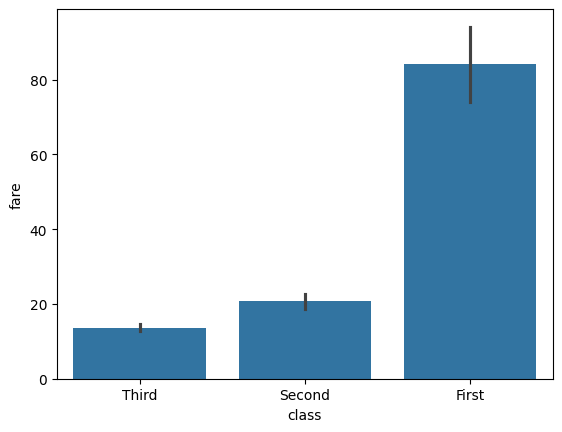

In [23]:
sns.barplot(data=df, x='class', y='fare', order=['Third', 'Second', 'First']);

In [30]:
df['Cclass'] = pd.Categorical(df['class'] , categories=['First', 'Second', 'Third'], ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    object  
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Cclass       891 non-null    category
dtypes: bool(2), category(1), float64(2), int64(4), object(7)
memory usage: 93.4+ KB


In [31]:
df['Cclass']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: Cclass, Length: 891, dtype: category
Categories (3, object): ['First' < 'Second' < 'Third']

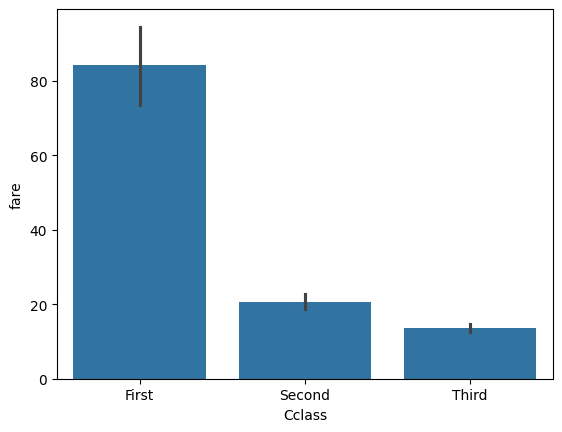

In [32]:
sns.barplot(data=df, x='Cclass', y='fare');

In [37]:
%pip install pyarrow

   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/25.1 MB 1.1 MB/s eta 0:00:23
    --------------------------------------- 0.3/25.1 MB 3.3 MB/s eta 0:00:08
   - -------------------------------------- 0.8/25.1 MB 5.4 MB/s eta 0:00:05
   -- ------------------------------------- 1.4/25.1 MB 7.4 MB/s eta 0:00:04
   --- ------------------------------------ 2.3/25.1 MB 9.7 MB/s eta 0:00:03
   ----- ---------------------------------- 3.2/25.1 MB 11.4 MB/s eta 0:00:02
   ------- -------------------------------- 4.4/25.1 MB 13.5 MB/s eta 0:00:02
   --------- ------------------------------ 5.9/25.1 MB 15.6 MB/s eta 0:00:02
   ----------- ---------------------------- 7.5/25.1 MB 17.8 MB/s eta 0:00:01
   -------------- ------------------------- 8.9/25.1 MB 19.0 MB/s eta 0:00:01
   ----------------- ---------------------- 10.8/25.1 MB 26.2 MB/s eta 0:00:01
   ---

In [38]:
df.to_parquet('data.parquet')

In [35]:
df2 = pd.read_csv('data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
 16  Cclass       891 non-null    object 
dtypes: bool(2), float64(2), int64(5), object(8)
memory usage: 106.3+ KB


In [39]:
df3 = pd.read_parquet('data.parquet')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    object  
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Cclass       891 non-null    category
dtypes: bool(2), category(1), float64(2), int64(4), object(7)
memory usage: 93.4+ KB


In [48]:
dd

,Cclass,fare
0,First,84.154687
1,Second,20.662183
2,Third,13.675550


C:\Users\nickdg\AppData\Local\Temp\ipykernel_22256\1585714935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dd = df.groupby('Cclass').fare.mean().to_frame().reset_index()


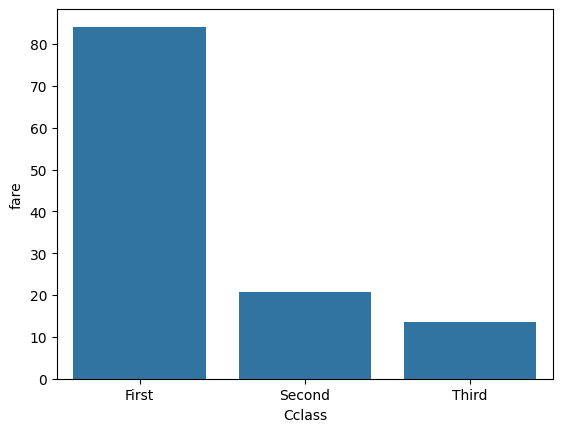

In [47]:
dd = df.groupby('Cclass').fare.mean().to_frame().reset_index()
sns.barplot(data=dd, x='Cclass', y='fare');

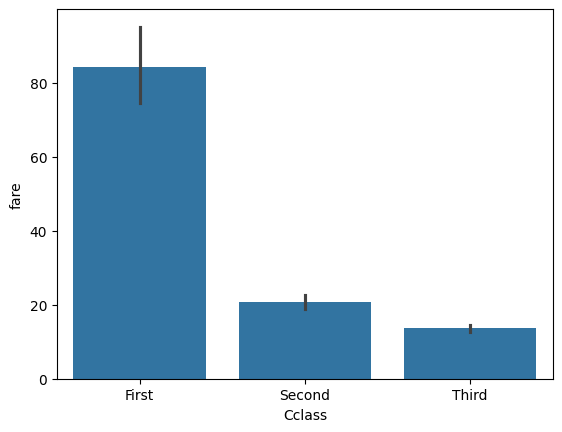

In [41]:
sns.barplot(data=df, x='Cclass', y='fare');

**Was there a significant difference in survival rate between each passenger class?**

ANOVA to check if a difference exists anywhere between the groups:

T-Tests to compare values between all combinations between the groups (i.e. if I'm comparing one class against another with a t-test, will I see a significant difference?)

Make a bar plot to show the mean value of each group:

Extra bar plot, just for fun: What was the survival rate, broken down by both sex and class? (hint: `hue=`)